In [55]:
pip install numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Q1 done below in blocks

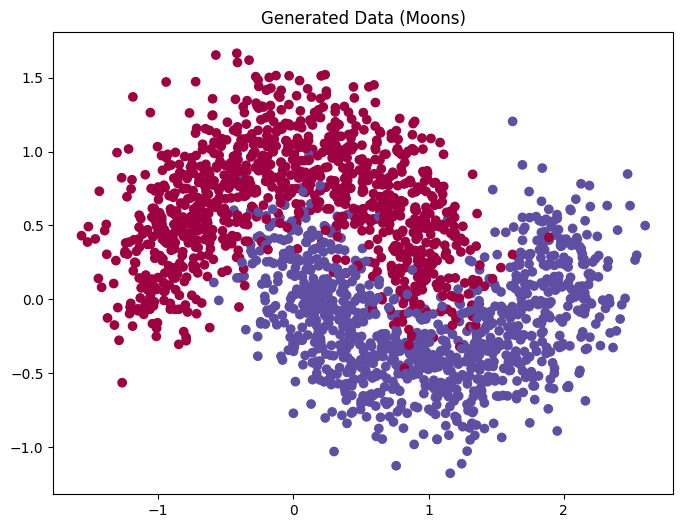

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import os

# Parameters
N = 2000
noise = 0.25

# Load synthetic data
X, Y = make_moons(n_samples=N, noise=noise)

# Visualization function
def plot_data(X, Y, save_path=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.title("Generated Data (Moons)")
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
    else:
        plt.show()

# Visualize data
plot_data(X, Y, save_path="input/viz/moon_data.png")


In [57]:
# define helper functions in utils_1batch.py

# ________________ sigmoid function ________________ #
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s
# ________________ relu function ________________ #
def relu(x):
    return np.maximum(0, x)

In [58]:
# ________________ initialize parameters ________________ #
def initialize_parameters(n_x, n_h, n_y):
    W1 = 0.5
    b1 = np.zeros((n_h, 1))
    W2 = 0.7
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

# ________________ compute forward propagation ________________ #
def forward_propagation(X, parameters, activation):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    X=X.T

    Z1 = np.dot(W1, X) + b1

    # there are 3 options for the function g()
    if activation == "tanh":
        A1 = np.tanh(Z1)
    elif activation == "sigmoid":
        A1 = sigmoid(Z1)
    elif activation == "relu":
        A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # store values for the back_propagation usage later
    temp_cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2,
    }

    return A2, temp_cache

In [59]:
def backward_propagation(parameters, temp_cache, X, Y, activation):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = temp_cache["A1"]
    A2 = temp_cache["A2"]

    # compute the backward_propagation
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    if activation == "tanh":
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # derivative of tanh
    elif activation == "sigmoid":
        dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))  # derivative of sigmoid
    elif activation == "relu":
        dZ1 = np.dot(W2.T, dZ2) * relu_derivative(A1)  # derivative of ReLU

    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients

# ________________ update the parameters ________________ #
def update_parameters(parameters, grads, learning_rate):
    # retrieve the parameters from the input
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # retrieve the gradient from the input
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    # update the parameters after comparing
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
    }

    return parameters

In [60]:
def nn_1layer_1batch(
    X, Y, n_h, learning_rate, activation, number_iterations, print_cost=False
):
    # set up
    np.random.seed(0)
    n_x = X.shape[0]
    n_y = Y.shape[0]

    # initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # initialize cost array
    costs = np.zeros(number_iterations)

    # Loop through forward and backward propagations
    for i in range(0, number_iterations):
        # apply forward_propagation
        A2, temp_cache = forward_propagation(X, parameters, activation)

        # compute the cost
        cost = compute_cost(A2, Y)

        # save the cost
        costs[i] = cost

        # apply backward_propagation
        grads = backward_propagation(parameters, temp_cache, X, Y, activation)

        # gradient descent parameter updats
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)

        # print the cost after every 1000 loops
        if print_cost and i % 1000 == 0:
            print("Cost after interation %i: %f" % (i, cost))

    return parameters, costs

In [61]:

# number of features
n_x = 2
# the number of nodes in the hidden layer
n_hs = np.array([1, 2, 3, 4, 5, 10, 50])
# choice of activation funtion
activations = np.array(["tanh", "sigmoid", "relu"])
# learning rate
learning_rates = np.array([1.2, 0.6, 0.1, 0.01, 0.001])
# number of iterations
number_iterations = np.array([100, 1000, 10000, 100000])

def run_test_1batch():
    # run the test
    test_nodes_1batch(
        file_name,
        data,
        n_hs,
        number_iterations=number_iterations,
        learning_rates=learning_rates,
        activations=activations,
        batch_type="one batch",
    )

In [62]:
# ________________ make predictions using the NN ________________ #
def predict(X, parameters, activation):
    X = X.T
    A2, temp_cache = forward_propagation(X, parameters, activation)
    predictions = (A2 > 0.5).astype(int)

    return predictions

# ________________ compute the accuracy of the NN ________________ #
def compute_accuracy(Y, Y_hat):
    accuracy = float(
        (np.dot(Y, Y_hat.T) + np.dot(1 - Y, 1 - Y_hat.T)) / float(Y.size) * 100
    )

    accuracy = round(accuracy, 2)

    return accuracy

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import os

# Parameters
N = 500
noise = 0.25

# Load synthetic data
X, Y = make_moons(n_samples=N, noise=noise)

In [64]:
import pickle

with open('/kaggle/input/output2/parameters_10_tanh_one batch_0.6_10000.pkl', 'rb') as file:
    parameters = pickle.load(file)

Y_hat = predict(X.T, parameters, "tanh")
accuracy = compute_accuracy(Y, Y_hat)
print(f"Accuracy: {accuracy} % ")

Accuracy: 94.2 % 


/tmp/ipykernel_31/1085682206.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(


Epoch 1/5 — Square Loss: 0.235778 | Cross‑Entropy Loss: 1.779895
Epoch 2/5 — Square Loss: 0.195403 | Cross‑Entropy Loss: 1.107313
Epoch 3/5 — Square Loss: 0.139630 | Cross‑Entropy Loss: 0.755386
Epoch 4/5 — Square Loss: 0.125791 | Cross‑Entropy Loss: 0.696322
Epoch 5/5 — Square Loss: 0.125123 | Cross‑Entropy Loss: 0.693640


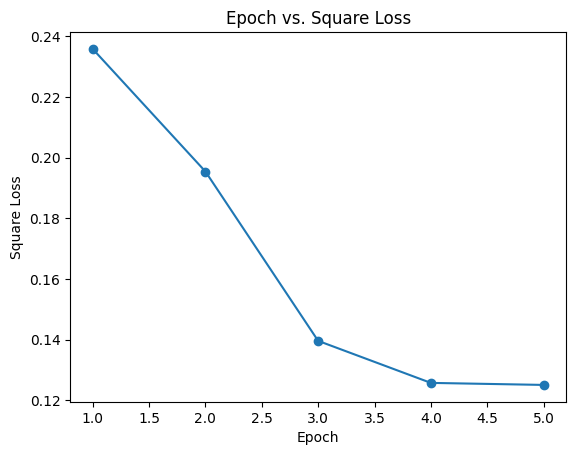

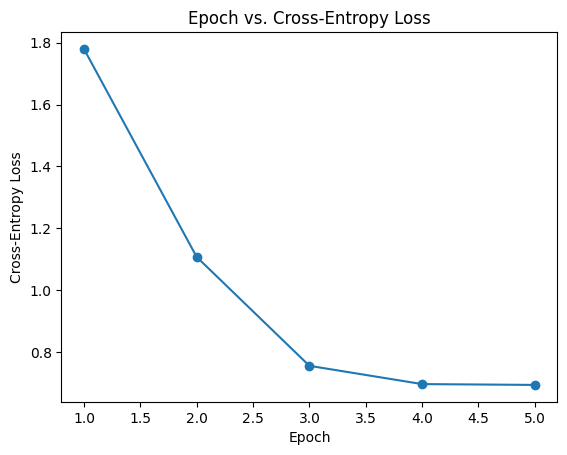

Predictions on new data: [[1 1 0 0]]


In [72]:
#Q2 and Q3 done below. 

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Helper Functions
# ---------------------------
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

def square_loss(A, Y):
    m = Y.shape[1]
    return (1/(2*m)) * np.sum((A - Y)**2)

def cross_entropy_loss(A, Y):
    m = Y.shape[1]
    A_clipped = np.clip(A, 1e-10, 1 - 1e-10)
    return - (1/m) * np.sum(Y * np.log(A_clipped) + (1 - Y) * np.log(1 - A_clipped))

# ---------------------------
# 2. Forward Propagation
# ---------------------------
def forward_propagation(X, parameters, activation="tanh"):
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]

    Z1 = W1.dot(X) + b1
    if activation == "tanh":
        A1 = np.tanh(Z1)
    elif activation == "sigmoid":
        A1 = sigmoid(Z1)
    elif activation == "relu":
        A1 = np.maximum(0, Z1)
    else:
        raise ValueError("Unsupported activation")

    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)

    return A2, {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

# ---------------------------
# 3. Backward Propagation
# ---------------------------
def backward_propagation(X, Y, parameters, cache, activation="tanh"):
    m = X.shape[1]
    W2 = parameters["W2"]
    A1, A2, Z1 = cache["A1"], cache["A2"], cache["Z1"]

    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    if activation == "tanh":
        dZ1 = dA1 * (1 - np.tanh(Z1)**2)
    elif activation == "sigmoid":
        A1_sig = sigmoid(Z1)
        dZ1 = dA1 * sigmoid_derivative(A1_sig)
    elif activation == "relu":
        dZ1 = dA1 * (Z1 > 0).astype(float)
    else:
        raise ValueError("Unsupported activation")

    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

# ---------------------------
# 4. Update Parameters
# ---------------------------
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters

# ---------------------------
# 5. Model Training
# ---------------------------
def model(X, Y, n_h, num_epochs=5, learning_rate=0.55, activation="tanh"):
    np.random.seed(42)
    n_x, n_y = X.shape[0], Y.shape[0]

    # — Initialize W1 to 0.5, W2 to 0.7 —
    parameters = {
        "W1": np.full((n_h, n_x), 0.5),
        "b1": np.zeros((n_h, 1)),
        "W2": np.full((n_y, n_h), 0.7),
        "b2": np.zeros((n_y, 1))
    }

    square_losses, cross_entropy_losses = [], []

    for epoch in range(1, num_epochs+1):
        A2, cache = forward_propagation(X, parameters, activation)
        s_loss = square_loss(A2, Y)
        ce_loss = cross_entropy_loss(A2, Y)
        square_losses.append(s_loss)
        cross_entropy_losses.append(ce_loss)

        grads = backward_propagation(X, Y, parameters, cache, activation)
        parameters = update_parameters(parameters, grads, learning_rate)

        print(f"Epoch {epoch}/{num_epochs} — Square Loss: {s_loss:.6f} | Cross‑Entropy Loss: {ce_loss:.6f}")

    return parameters, {"square": square_losses, "cross_entropy": cross_entropy_losses}

# ---------------------------
# 6. Prediction
# ---------------------------
def predict(X, parameters, activation="tanh", threshold=0.5):
    A2, _ = forward_propagation(X, parameters, activation)
    return (A2 > threshold).astype(int)

# ---------------------------
# 7. Run on Synthetic Data
# ---------------------------
X = np.array([[1,7,8],
              [3,6,7],
              [2,2,4],
              [1,2,3]]).T  # (3,4)
Y = np.array([[0,0,1,1]])  # (1,4)

params, losses = model(X, Y, n_h=5, num_epochs=5, learning_rate=0.55, activation="tanh")

# ---------------------------
# 8. Plot Losses
# ---------------------------
epochs = np.arange(1, len(losses["square"])+1)

plt.figure()
plt.plot(epochs, losses["square"], marker='o')
plt.title("Epoch vs. Square Loss")
plt.xlabel("Epoch")
plt.ylabel("Square Loss")
plt.show()

plt.figure()
plt.plot(epochs, losses["cross_entropy"], marker='o')
plt.title("Epoch vs. Cross‑Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross‑Entropy Loss")
plt.show()

# ---------------------------
# 9. Predict on New Data
# ---------------------------
newInput = np.array([[10, 3, -1],
                     [3,  4,  2],
                     [2, -3,  4],
                     [1,  0,  3]]).T

preds = predict(newInput, params, activation="tanh")
print("Predictions on new data:", preds)



--- TRAINING ON SQUARED LOSS WITH LINEAR OUTPUT ---
Epoch 1/10 - Cost: 0.253137
Epoch 2/10 - Cost: 0.248950
Epoch 3/10 - Cost: 0.244904
Epoch 4/10 - Cost: 0.240994
Epoch 5/10 - Cost: 0.237216
Epoch 6/10 - Cost: 0.233564
Epoch 7/10 - Cost: 0.230035
Epoch 8/10 - Cost: 0.226623
Epoch 9/10 - Cost: 0.223325
Epoch 10/10 - Cost: 0.220136


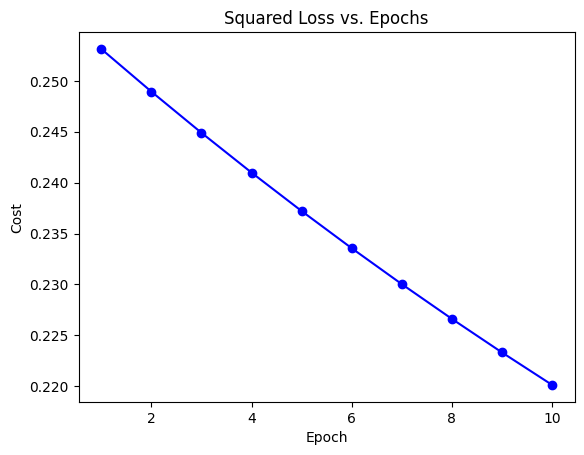


Predictions on new data: [[1 0 0 0]]


In [76]:
#question 4
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1. Activation Functions and Their Derivatives
# =============================================================================
def relu(Z):
    """Compute the ReLU activation."""
    return np.maximum(0, Z)

def relu_derivative(Z):
    """Compute the derivative of ReLU."""
    return (Z > 0).astype(float)

# =============================================================================
# 2. Loss Functions
# =============================================================================
def compute_squared_loss(A, Y):
    """
    Compute the mean squared loss.
    A -- predictions, shape (1, m)
    Y -- true labels, shape (1, m)
    """
    m = Y.shape[1]
    return (1/(2*m)) * np.sum((A - Y) ** 2)

# =============================================================================
# 3. Parameter Initialization (Deep Random Initialization with He Scaling)
# =============================================================================
def initialize_parameters_deep(layer_dims):
    """
    Initialize parameters for a deep network with random values.
    layer_dims -- list of the dimensions for each layer (e.g., [n_x, 5, 5, 5, 5, n_y])
    Returns a dictionary containing "W1", "b1", ..., "WL", "bL".
    """
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        # He initialization for ReLU: scaled by sqrt(2/fan_in)
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2.0 / layer_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

# =============================================================================
# 4. Forward Propagation (Hidden Layers: ReLU, Output Layer: Linear for Squared Loss)
# =============================================================================
def forward_propagation(X, parameters, final_activation="linear"):
    """
    Implements forward propagation for an L-layer network.
    
    Arguments:
    X -- input data, shape (n_x, m)
    parameters -- dictionary of parameters
    final_activation -- type of activation for the output layer; "linear" is used here for squared loss.
    
    Returns:
    A_final -- the output of the network, shape (n_y, m)
    caches -- list of caches, one for each layer.
    """
    caches = []
    A = X
    L = len(parameters) // 2   # number of layers

    # Hidden layers - use ReLU activation.
    for l in range(1, L):
        A_prev = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z = np.dot(W, A_prev) + b
        A = relu(Z)
        caches.append((A_prev, W, b, Z))
    
    # Output layer.
    W = parameters["W" + str(L)]
    b = parameters["b" + str(L)]
    Z = np.dot(W, A) + b

    if final_activation == "linear":
        A_final = Z  # no activation function for linear output
    elif final_activation == "relu":
        A_final = relu(Z)
    else:
        raise ValueError("Unknown final activation.")
    
    caches.append((A, W, b, Z))
    return A_final, caches

# =============================================================================
# 5. Backward Propagation (for Squared Loss with Linear Output)
# =============================================================================
def backward_propagation(AL, Y, caches, final_activation="linear"):

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    
    # Output layer:
    # For a linear output, dZ = (AL - Y)
    # Retrieve cache from the last layer. (For consistency, we use the final stored cache.)
    A_prev, W_last, b_last, Z_last = caches[-1]
    dZ = AL - Y
    grads["dW" + str(L)] = (1/m) * np.dot(dZ, caches[L-2][0].T) if L > 1 else (1/m) * np.dot(dZ, A_prev.T)
    grads["db" + str(L)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W_last.T, dZ)

    # Hidden layers:
    for l in reversed(range(1, L)):
        A_prev, W, b, Z = caches[l-1]
        dZ = dA_prev * relu_derivative(Z)
        grads["dW" + str(l)] = (1/m) * np.dot(dZ, A_prev.T)
        grads["db" + str(l)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)
    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update the parameters using gradient descent.
    """
    L = len(parameters) // 2
    for l in range(1, L+1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    return parameters

# =============================================================================
# 7. L-Layer Model Training Function (Squared Loss Variant)
# =============================================================================
def model(X, Y, layer_dims, num_epochs=10, learning_rate=0.01):
    """
    Trains the L-layer neural network using squared loss and a linear output.
    
    Arguments:
    X -- input data, shape (n_x, m)
    Y -- true labels, shape (1, m)
    layer_dims -- list of layer dimensions, e.g., [n_x, 5, 5, 5, 5, n_y] for a 5-layer net.
    num_epochs -- number of epochs to train
    learning_rate -- learning rate for gradient descent
    
    Returns:
    parameters -- trained parameters
    costs -- list of costs computed per epoch
    """
    parameters = initialize_parameters_deep(layer_dims)
    costs = []

    for epoch in range(num_epochs):
        AL, caches = forward_propagation(X, parameters, final_activation="linear")
        cost = compute_squared_loss(AL, Y)
        costs.append(cost)
        grads = backward_propagation(AL, Y, caches, final_activation="linear")
        parameters = update_parameters(parameters, grads, learning_rate)
        print(f"Epoch {epoch+1}/{num_epochs} - Cost: {cost:.6f}")
        
    return parameters, costs

# =============================================================================
# 8. Prediction Function
# =============================================================================
def predict(X, parameters, final_activation="linear", threshold=0.5):
    """
    Generates binary predictions given the input data X.
    
    For squared loss, with linear output, we apply a threshold.
    
    Arguments:
    X -- input data, shape (n_x, m)
    parameters -- dictionary of trained parameters
    final_activation -- should be "linear" if squared loss is used.
    threshold -- threshold to decide 0 vs. 1 for binary classification.
    
    Returns:
    predictions -- array of shape (1, m) with binary predictions (0/1).
    """
    AL, _ = forward_propagation(X, parameters, final_activation=final_activation)
    predictions = (AL > threshold).astype(int)
    return predictions

# =============================================================================
# 9. DEMO: Train on a Synthetic Dataset and Predict on New Data
# =============================================================================
def run_demo():
    # --- Training Data ---
    # Synthetic dataset: 4 examples, 3 features each.
    X_raw = np.array([[1, 7, 8],
                      [3, 6, 7],
                      [2, 2, 4],
                      [1, 2, 3]])
    # In the question, examples are rows; transpose so each column is an example.
    X_train = X_raw.T  # Now shape (3, 4)
    Y_train = np.array([[0, 0, 1, 1]])  # shape (1, 4)

    # Define a 5-layer network (4 hidden layers + 1 output layer).
    # For example: [n_x, 5, 5, 5, 5, n_y] => [3, 5, 5, 5, 5, 1]
    layer_dims = [3, 5, 5, 5, 5, 1]

    # Train the model for 10 epochs with a learning rate of 0.01.
    print("\n--- TRAINING ON SQUARED LOSS WITH LINEAR OUTPUT ---")
    parameters, costs = model(X_train, Y_train, layer_dims, num_epochs=10, learning_rate=0.01)

    # Plot the cost evolution
    plt.plot(range(1, 11), costs, marker='o', color='blue')
    plt.title("Squared Loss vs. Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()

    # --- New Data for Prediction ---
    # newInput given as:
    # newInput = np.array([[10, 3, -1],
    #                      [3,  4,  2],
    #                      [2, -3,  4],
    #                      [1,  0,  3]]).T
    # Make sure newInput has the same number of features (3) per example.
    # Here, newInput is provided with 4 rows; we transpose to get shape (3, m_new).
    newInput_raw = np.array([[10, 3, -1],
                             [3,  4,  2],
                             [2, -3,  4],
                             [1,  0,  3]])
    X_new = newInput_raw.T  # X_new shape becomes (3, 4)

    # Generate predictions on the new dataset.
    predictions_new = predict(X_new, parameters, final_activation="linear", threshold=0.5)
    print("\nPredictions on new data:", predictions_new)

# Run the demo:
run_demo()



--- TRAINING WITH SQUARED LOSS (Linear Output) AND LEAKY RELU IN HIDDEN LAYERS ---
Epoch 1/10 - Cost: 0.257441
Epoch 2/10 - Cost: 0.252987
Epoch 3/10 - Cost: 0.248688
Epoch 4/10 - Cost: 0.244540
Epoch 5/10 - Cost: 0.240535
Epoch 6/10 - Cost: 0.236669
Epoch 7/10 - Cost: 0.232936
Epoch 8/10 - Cost: 0.229331
Epoch 9/10 - Cost: 0.225850
Epoch 10/10 - Cost: 0.222488


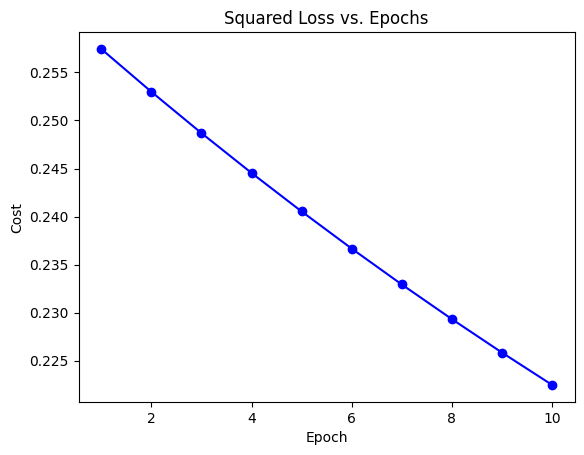


Predictions on new data: [[1 0 0 0]]


In [68]:
import numpy as np
import matplotlib.pyplot as plt


def leaky_relu(Z, alpha=0.01):
    """Compute the Leaky ReLU activation."""
    return np.where(Z > 0, Z, alpha * Z)

def leaky_relu_derivative(Z, alpha=0.01):
    """Compute the derivative of Leaky ReLU."""
    return np.where(Z > 0, 1, alpha)

def compute_squared_loss(A, Y):
    """
    Compute the mean squared loss.
    A -- predictions, shape (1, m)
    Y -- true labels, shape (1, m)
    """
    m = Y.shape[1]
    return (1/(2*m)) * np.sum((A - Y) ** 2)


def initialize_parameters_deep(layer_dims):
    """
    Initialize parameters for a deep network with random values.
    layer_dims -- list of the dimensions for each layer (e.g., [n_x, 5, 5, 5, 5, n_y])
    Returns a dictionary containing "W1", "b1", ..., "WL", "bL".
    """
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        # He initialization: scale by sqrt(2 / fan_in)
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2.0 / layer_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters


def forward_propagation(X, parameters, final_activation="linear"):

    caches = []
    A = X
    L = len(parameters) // 2   # number of layers

    # Hidden layers: use Leaky ReLU
    for l in range(1, L):
        A_prev = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z = np.dot(W, A_prev) + b
        A = leaky_relu(Z)  # Use Leaky ReLU instead of standard ReLU
        caches.append((A_prev, W, b, Z))
    
    # Output layer (linear for squared loss)
    W = parameters["W" + str(L)]
    b = parameters["b" + str(L)]
    Z = np.dot(W, A) + b

    if final_activation == "linear":
        A_final = Z
    elif final_activation == "relu":
        A_final = leaky_relu(Z)
    else:
        raise ValueError("Unknown final activation.")
    
    caches.append((A, W, b, Z))
    return A_final, caches

def backward_propagation(AL, Y, caches, final_activation="linear"):
    """
    Implements backward propagation for the L-layer network.
    
    Arguments:
    AL -- output of forward propagation, shape (1, m)
    Y -- true labels, shape (1, m)
    caches -- list of caches from forward propagation.
    final_activation -- activation for the output; should be "linear" for squared loss.
    
    Returns:
    grads -- dictionary of gradients.
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    
    # Output layer: For linear output, derivative dZ = (AL - Y)
    A_prev, W_last, b_last, Z_last = caches[-1]
    dZ = AL - Y
    # In this implementation, if there is at least one hidden layer,
    # we use the cache from the previous layer as A_prev.
    if L > 1:
        grads["dW" + str(L)] = (1/m) * np.dot(dZ, caches[L-2][0].T)
    else:
        grads["dW" + str(L)] = (1/m) * np.dot(dZ, A_prev.T)
    grads["db" + str(L)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W_last.T, dZ)

    # Hidden layers: use derivative of Leaky ReLU
    for l in reversed(range(1, L)):
        A_prev, W, b, Z = caches[l-1]
        dZ = dA_prev * leaky_relu_derivative(Z)
        grads["dW" + str(l)] = (1/m) * np.dot(dZ, A_prev.T)
        grads["db" + str(l)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)
    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update the parameters using gradient descent.
    """
    L = len(parameters) // 2
    for l in range(1, L+1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    return parameters


def model(X, Y, layer_dims, num_epochs=10, learning_rate=0.01):
   
    parameters = initialize_parameters_deep(layer_dims)
    costs = []

    for epoch in range(num_epochs):
        AL, caches = forward_propagation(X, parameters, final_activation="linear")
        cost = compute_squared_loss(AL, Y)
        costs.append(cost)
        grads = backward_propagation(AL, Y, caches, final_activation="linear")
        parameters = update_parameters(parameters, grads, learning_rate)
        print(f"Epoch {epoch+1}/{num_epochs} - Cost: {cost:.6f}")
        
    return parameters, costs


def predict(X, parameters, final_activation="linear", threshold=0.5):
   
    AL, _ = forward_propagation(X, parameters, final_activation=final_activation)
    predictions = (AL > threshold).astype(int)
    return predictions


def run_demo():
   
    X_raw = np.array([[1, 7, 8],
                      [3, 6, 7],
                      [2, 2, 4],
                      [1, 2, 3]])
    X_train = X_raw.T  # Shape becomes (3, 4)
    Y_train = np.array([[0, 0, 1, 1]])  # Shape (1, 4)

    layer_dims = [3, 5, 5, 5, 5, 1]

    print("\n--- TRAINING WITH SQUARED LOSS (Linear Output) AND LEAKY RELU IN HIDDEN LAYERS ---")
    parameters, costs = model(X_train, Y_train, layer_dims, num_epochs=10, learning_rate=0.01)

    plt.plot(range(1, 11), costs, marker='o', color='blue')
    plt.title("Squared Loss vs. Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()

    newInput_raw = np.array([[10, 3, -1],
                             [3,  4,  2],
                             [2, -3,  4],
                             [1,  0,  3]])
    X_new = newInput_raw.T  # X_new becomes shape (3, 4)

    predictions_new = predict(X_new, parameters, final_activation="linear", threshold=0.5)
    print("\nPredictions on new data:", predictions_new)

run_demo()



--- Training: Squared Loss with ReLU Activation (Leaky ReLU used) ---
Epoch 1/10 - Cost: 0.250072
Epoch 2/10 - Cost: 0.250071
Epoch 3/10 - Cost: 0.250071
Epoch 4/10 - Cost: 0.250071
Epoch 5/10 - Cost: 0.250070
Epoch 6/10 - Cost: 0.250070
Epoch 7/10 - Cost: 0.250069
Epoch 8/10 - Cost: 0.250069
Epoch 9/10 - Cost: 0.250068
Epoch 10/10 - Cost: 0.250068
Predictions on training data (Squared Loss): [[0 0 0 0]]

--- Training: Cross Entropy Loss with ReLU Activation (Leaky ReLU used) ---
Epoch 1/10 - Cost: 11.512925
Epoch 2/10 - Cost: 11.512925
Epoch 3/10 - Cost: 11.512925
Epoch 4/10 - Cost: nan
Epoch 5/10 - Cost: nan
Epoch 6/10 - Cost: nan
Epoch 7/10 - Cost: nan
Epoch 8/10 - Cost: nan
Epoch 9/10 - Cost: nan
Epoch 10/10 - Cost: nan
Predictions on training data (Cross Entropy): [[0 0 0 0]]


/tmp/ipykernel_31/3269206435.py:5: RuntimeWarning: invalid value encountered in greater
  return np.where(Z > 0, Z, alpha * Z)
/tmp/ipykernel_31/3269206435.py:17: RuntimeWarning: invalid value encountered in log
  loss = - (1/m) * np.sum(Y * np.log(A_clipped) + (1 - Y) * np.log(1 - A_clipped))
/tmp/ipykernel_31/3269206435.py:8: RuntimeWarning: invalid value encountered in greater
  return np.where(Z > 0, 1, alpha)
/tmp/ipykernel_31/3269206435.py:97: RuntimeWarning: invalid value encountered in greater
  predictions = (AL > threshold).astype(int)


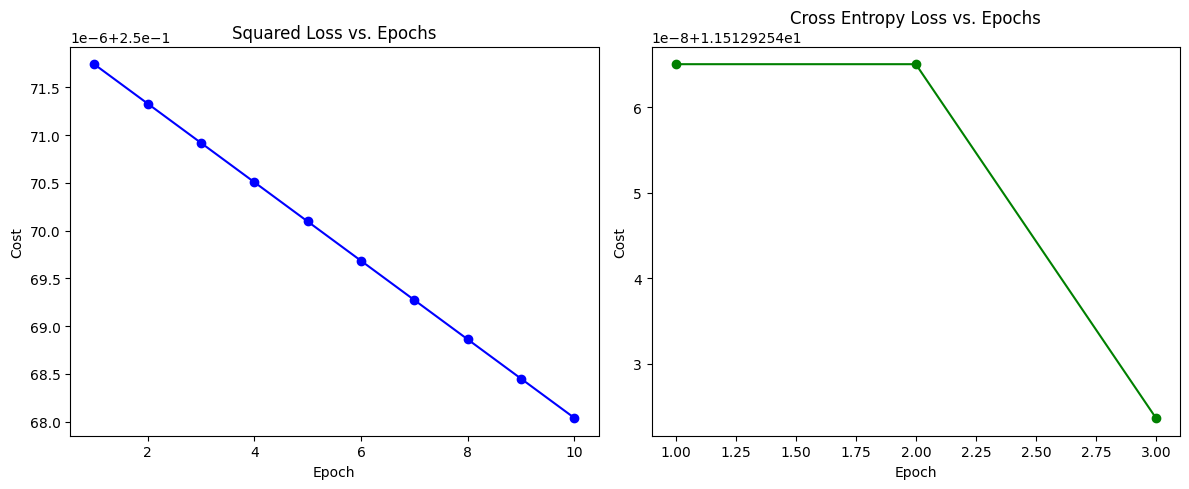


Predictions on new data (Squared Loss variant): [[1 0 0 0]]
Predictions on new data (Cross Entropy variant): [[0 0 0 0]]


In [69]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def leaky_relu_derivative(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

def compute_squared_loss(A, Y):
    m = Y.shape[1]
    return (1/(2*m)) * np.sum((A - Y)**2)

def compute_cross_entropy_loss(A, Y):
    m = Y.shape[1]
    A_clipped = np.clip(A, 1e-10, 1-1e-10)
    loss = - (1/m) * np.sum(Y * np.log(A_clipped) + (1 - Y) * np.log(1 - A_clipped))
    return loss

def initialize_parameters_deep(layer_dims):
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2.0 / layer_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def forward_propagation(X, parameters, final_activation="relu"):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        Z = np.dot(W, A_prev) + b
        A = leaky_relu(Z)
        caches.append((A_prev, W, b, Z))
    W = parameters["W" + str(L)]
    b = parameters["b" + str(L)]
    Z = np.dot(W, A) + b
    A_final = leaky_relu(Z)
    caches.append((A, W, b, Z))
    return A_final, caches

def backward_propagation(AL, Y, caches, loss_type="squared", final_activation="relu"):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    A_prev, W_last, b_last, Z_last = caches[-1]
    if loss_type == "squared":
        dZ = (AL - Y) * leaky_relu_derivative(Z_last)
    elif loss_type == "cross_entropy":
        A_clipped = np.clip(AL, 1e-10, 1-1e-10)
        dAL = - (np.divide(Y, A_clipped) - np.divide(1-Y, 1-A_clipped))
        dZ = dAL * leaky_relu_derivative(Z_last)
    else:
        raise ValueError("loss_type must be 'squared' or 'cross_entropy'")
    grads["dW" + str(L)] = (1/m) * np.dot(dZ, caches[L-2][0].T) if L > 1 else (1/m) * np.dot(dZ, A_prev.T)
    grads["db" + str(L)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W_last.T, dZ)
    for l in reversed(range(1, L)):
        A_prev, W, b, Z = caches[l-1]
        dZ = dA_prev * leaky_relu_derivative(Z)
        grads["dW" + str(l)] = (1/m) * np.dot(dZ, A_prev.T)
        grads["db" + str(l)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L+1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    return parameters

def L_layer_model(X, Y, layer_dims, num_epochs=10, learning_rate=0.01, loss_type="squared"):
    parameters = initialize_parameters_deep(layer_dims)
    costs = []
    for epoch in range(num_epochs):
        AL, caches = forward_propagation(X, parameters, final_activation="relu")
        if loss_type == "squared":
            cost = compute_squared_loss(AL, Y)
        elif loss_type == "cross_entropy":
            cost = compute_cross_entropy_loss(AL, Y)
        else:
            raise ValueError("loss_type must be 'squared' or 'cross_entropy'")
        costs.append(cost)
        grads = backward_propagation(AL, Y, caches, loss_type, final_activation="relu")
        parameters = update_parameters(parameters, grads, learning_rate)
        print(f"Epoch {epoch+1}/{num_epochs} - Cost: {cost:.6f}")
    return parameters, costs

def predict(X, parameters, final_activation="relu", threshold=0.5):
    AL, _ = forward_propagation(X, parameters, final_activation=final_activation)
    predictions = (AL > threshold).astype(int)
    return predictions

def run_demo():
    X_raw = np.array([[1, 7, 8],
                      [3, 6, 7],
                      [2, 2, 4],
                      [1, 2, 3]])
    X_train = X_raw.T
    Y_train = np.array([[0, 0, 1, 1]])
    layer_dims = [3, 5, 5, 5, 5, 1]
    print("\n--- Training: Squared Loss with ReLU Activation (Leaky ReLU used) ---")
    parameters_squared, costs_squared = L_layer_model(X_train, Y_train, layer_dims, num_epochs=10, learning_rate=0.01, loss_type="squared")
    preds_squared = predict(X_train, parameters_squared, final_activation="relu", threshold=0.5)
    print("Predictions on training data (Squared Loss):", preds_squared)
    print("\n--- Training: Cross Entropy Loss with ReLU Activation (Leaky ReLU used) ---")
    parameters_ce, costs_ce = L_layer_model(X_train, Y_train, layer_dims, num_epochs=10, learning_rate=0.01, loss_type="cross_entropy")
    preds_ce = predict(X_train, parameters_ce, final_activation="relu", threshold=0.5)
    print("Predictions on training data (Cross Entropy):", preds_ce)
    epochs_range = np.arange(1, 11)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs_range, costs_squared, marker='o', color='blue')
    plt.title('Squared Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.subplot(1,2,2)
    plt.plot(epochs_range, costs_ce, marker='o', color='green')
    plt.title('Cross Entropy Loss vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.tight_layout()
    plt.show()
    newInput_raw = np.array([[10, 3, -1],
                             [3,  4,  2],
                             [2, -3,  4],
                             [1,  0,  3]])
    X_new = newInput_raw.T
    preds_new_squared = predict(X_new, parameters_squared, final_activation="relu", threshold=0.5)
    preds_new_ce = predict(X_new, parameters_ce, final_activation="relu", threshold=0.5)
    print("\nPredictions on new data (Squared Loss variant):", preds_new_squared)
    print("Predictions on new data (Cross Entropy variant):", preds_new_ce)

run_demo()


In [ ]:
#used leaky relu because Relu was causing all the outputs to be 0 on new data